In [69]:
from ase.io import read
import ase
from ase.visualize import view
import numpy as np
import nglview as nv
import networkx as nx
%matplotlib inline

In [70]:
Atoms = ase.io.read('first_trials/coronene.990000.cfg')
Atomse = ase.io.read('first_trials/coronene.10000.cfg')
Atomsm = ase.io.read('first_trials/coronene.500000.cfg')

In [71]:
arr = Atoms.get_positions()
arr = np.broadcast_to(arr, (arr.shape[0], arr.shape[0], arr.shape[1]))
arr = np.sum(arr**2, axis=2)**0.5
arr.shape

(576, 576)

In [72]:
def get_bond_graph(atoms, bond_length=1.85):
    coords = atoms.get_positions()
    coords = np.broadcast_to(coords, (coords.shape[0], coords.shape[0], coords.shape[1]))
    distances = coords - np.transpose(coords, (1, 0, 2))
    del coords
    box_params = np.broadcast_to(atoms.get_cell().lengths(), distances.shape)
    distances = np.minimum(np.abs(distances), np.abs(box_params - np.abs(distances)))
    del box_params
    distances = np.sum(distances**2, axis=len(distances.shape)-1)**0.5
    adj_matrix = distances
    del distances
    adj_matrix[adj_matrix > bond_length] = 0
    bond_graph = nx.from_numpy_matrix(adj_matrix)
    
    return bond_graph    

In [73]:
view(Atomse, viewer='ngl')

In [87]:
nx.algorithms.components.number_connected_components(bond_graph)

16

/home/vladimir/miniconda3/envs/carbon/lib/python3.6/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


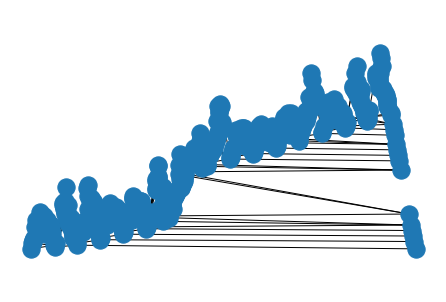

In [ ]:
def in_cube(x0,y0,z0,x,y,z,bond_len):
        return True

In [ ]:
hyb = []
for i in range(len(Atoms.get_atomic_numbers())):
    if Atoms.get_atomic_numbers()[i] == 6:
        count = 0
        for j in range(len(Atoms.get_atomic_numbers())):
               x0 = Atoms.get_positions()[i][0]
               y0 = Atoms.get_positions()[i][1]
               z0 = Atoms.get_positions()[i][2]
               x = Atoms.get_positions()[j][0]
               y = Atoms.get_positions()[j][1]
               z = Atoms.get_positions()[j][2]
               if in_cube(x0,y0,z0,x,y,z,1.8) == True:
                   r = np.sqrt((x-x0)**2 + (y-y0)**2 + (z-z0)**2)
                   if r<=1.8:
                       count+=1
            
        hyb.append([i,count-1])
    

In [ ]:
def return_hybridisation(Atoms):
    Dist = Atoms.get_all_distances(mic=True)
    hybr = []
    for i in range(len(Atoms.get_atomic_numbers())):
        if Atoms.get_atomic_numbers()[i] == 6:
            count = 0
            for j in range(len(Dist[i])):
                if Dist[i][j] < 1.8:
                    count += 1
            hybr.append([i,count-1])
    for a in range(len(hybr)):
        if hybr[a][1] == 0:
            hybr[a][1] = 'no_hybr'
        elif hybr[a][1] == 1:
            hybr[a][1] = 'no_hybr'
        elif hybr[a][1] == 2:
            hybr[a][1] = 'sp'
        elif hybr[a][1] == 3:
            hybr[a][1] = 'sp2'
        elif hybr[a][1] ==  4:
            hybr[a][1] = 'sp3'
        else: 
            hybr[a][1] = '???'
    return hybr
    

In [ ]:
early = return_hybridisation(Atomse)
mid = return_hybridisation(Atoms)
late = return_hybridisation(Atomsl)

In [ ]:
early